In [1]:
import pandas as pd
f=open('E:/jupyter/temps_extended.csv')
features=pd.read_csv(f)
features.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [2]:
print('数据规模：',features.shape)

数据规模： (2191, 12)


In [3]:
##处理时间数据
import datetime

years=features['year']
months=features['month']
days=features['day']

#datatime格式
dates=[str(int(year)) + '-'+ str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]
dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

In [4]:
import matplotlib.pyplot as plt
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,10))
fig.autofmt_xdate(rotation=45)
##平均最高气温
ax1.plot(dates,features['average'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature (F)')
ax1.set_title('History Avg Max Temp')

##风速
ax2.plot(dates,features['ws_1'],'r-')
ax2.set_xlabel('')
ax2.set_ylabel('Wind Speed (mph)')
ax2.set_title('Prior Wind Speed')

##降水
ax3.plot(dates,features['prcp_1'],'r-')
ax3.set_xlabel('Date')
ax3.set_ylabel('Precipitation (in)')
ax3.set_title('Prior Precipitation')

##积雪
ax4.plot(dates,features['snwd_1'],'ro')
ax4.set_xlabel('Date')
ax4.set_ylabel('Snow Depth(in)')
ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)

### 特征工程

**显然天气的变换与季节因素有关，但是，在原始数据中没有季节特征指标，因此可以创建指标**

In [5]:
##创建季节变量
seasons=[]
for month in features['month']:
    if month in [1,2,12]:
        seasons.append('winter')
    elif month in [3,4,5]:
        seasons.append('spring')
    elif month in [6,7,8]:
        seasons.append('summer')
    elif month in [9,10,11]:
        seasons.append('fall')
reduced_features=features[['temp_1','prcp_1','average','actual']]
reduced_features['season']=seasons
reduced_features.head()
        

D:\cainiao\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,temp_1,prcp_1,average,actual,season
0,37,0.00,45.6,40,winter
1,40,0.00,45.7,39,winter
2,39,0.00,45.8,42,winter
3,42,0.00,45.9,38,winter
4,38,0.03,46.0,45,winter


In [6]:
import seaborn as sns

D:\cainiao\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


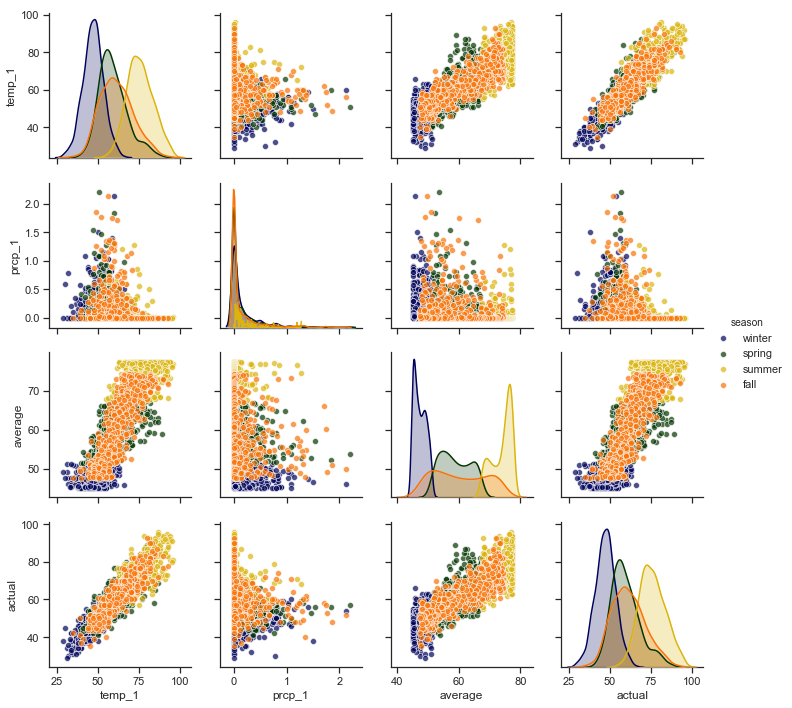

In [7]:
sns.set(style='ticks',color_codes=True)
##颜色模板
palette=sns.xkcd_palette(['dark blue','dark green','gold','orange'])
##绘制
sns.pairplot(reduced_features,hue='season',palette=palette,diag_kind='kde',plot_kws=dict(alpha=0.7),diag_kws=dict(shade=True))


In [8]:
#3预处理数据
##独热编码
features=pd.get_dummies(features)
##提取标签和特征
labels=features['actual']
features=features.drop('actual',axis=1)
##特征列表
feature_list=list(features.columns)

In [9]:
##准换数据格式（数组形式）
import numpy as np

In [10]:
features=np.array(features)
labels=np.array(labels)
##切分数据
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.25,random_state=0)
print('训练集特征：',train_features.shape)
print('训练集标签：',train_labels.shape)
print('测试集特征：',test_features.shape)
print('测试集标签：',test_labels.shape)

训练集特征： (1643, 17)
训练集标签： (1643,)
测试集特征： (548, 17)
测试集标签： (548,)


In [14]:
##老数据集的特征，避免特征的个数对模型的影响
original_feature_indices=[feature_list.index(feature) for feature in feature_list if feature not in ['ws_1','prcp_1','snwd_1']]
##读取老数据
original_features=pd.read_csv('E:/study/data/temps.csv')
original_features=pd.get_dummies(original_features)

In [15]:
original_features[:5]

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [16]:
import numpy as np
original_labels=np.array(original_features['actual'])
original_features=original_features.drop('actual',axis=1)
original_feature_list=list(original_features.columns)
original_features=np.array(original_features)

In [18]:
##切分数据集
from sklearn.model_selection import train_test_split
original_train_features,original_test_features,original_train_labels,original_test_labels=train_test_split(original_features,original_labels,test_size=0.25,random_state=42)


In [20]:
##建立树模型
from sklearn.ensemble import RandomForestRegressor
##相同的参数与随机种子
rf=RandomForestRegressor(n_estimators=100,random_state=0)
##训练原始数据集
rf.fit(original_train_features,original_train_labels)
##为了测试公平，使用一致的测试集
predictions=rf.predict(test_features[:,original_feature_indices])##新数据切分里面的
##温度平均误差
errors=abs(predictions-test_labels)
print('平均温度误差：',round(np.mean(errors),2),'degrees.')
##MAPE
mape=100*(errors/test_labels)
accuracy=100-np.mean(mape)
print('原始数据的Accuracy:',round(accuracy,2),'%.')

平均温度误差： 4.67 degrees.
原始数据的Accuracy: 92.2 %.


**样本增多时**

In [24]:
from sklearn.ensemble import RandomForestRegressor
##剔除新特征，保证数据特征一致
original_train_features=train_features[:,original_feature_indices]
original_test_features=test_features[:,original_feature_indices]
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(original_train_features,train_labels)
baseline_predictions=rf.predict(original_test_features)
baseline_errors=abs(baseline_predictions-test_labels)
print('平均温度误差：',round(np.mean(baseline_errors),2),'degrees.')
##mape
baseline_mape=100*np.mean((baseline_errors/test_labels))
##精度
baseline_accuracy=100-baseline_mape
print('数据增加后Accuracy',round(baseline_accuracy,2),'%.')

平均温度误差： 4.2 degrees.
数据增加后Accuracy 93.12 %.


**特征增多时**

In [26]:
##对加入新的特征的数据进行建模
from sklearn.ensemble import RandomForestRegressor
rf_exp=RandomForestRegressor(n_estimators=100,random_state=0)
rf_exp.fit(train_features,train_labels)
##选取同样的测试集
predictions=rf_exp.predict(test_features)
##评估
errors=abs(predictions-test_labels)
print('平均温度误差：',round(np.mean(errors),2),'degrees.')
##mape
mape=np.mean(100*(errors/test_labels))
##提升情况
improvement_baseline=100*abs(mape-baseline_mape)/baseline_mape
print('特征增多时效果提升：',round(improvement_baseline,2),'%.')
##精度
accuracy=100-mape
print('Accuracy:',round(accuracy,2),'%.')

平均温度误差： 4.05 degrees.
特征增多时效果提升： 3.34 %.
Accuracy: 93.35 %.


**再次研究特征重要性**

In [27]:
importances=list(rf_exp.feature_importances_)
##组合成列表
feature_importances=[(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]
feature_importances=sorted(feature_importances,key=lambda x:x[1],reverse=True)
##结果
[print('Variable {:15} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable temp_1          Importance: 0.85
Variable average         Importance: 0.05
Variable ws_1            Importance: 0.02
Variable friend          Importance: 0.02
Variable year            Importance: 0.01
Variable month           Importance: 0.01
Variable day             Importance: 0.01
Variable prcp_1          Importance: 0.01
Variable temp_2          Importance: 0.01
Variable snwd_1          Importance: 0.0
Variable weekday_Fri     Importance: 0.0
Variable weekday_Mon     Importance: 0.0
Variable weekday_Sat     Importance: 0.0
Variable weekday_Sun     Importance: 0.0
Variable weekday_Thurs   Importance: 0.0
Variable weekday_Tues    Importance: 0.0
Variable weekday_Wed     Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Variable Importances')

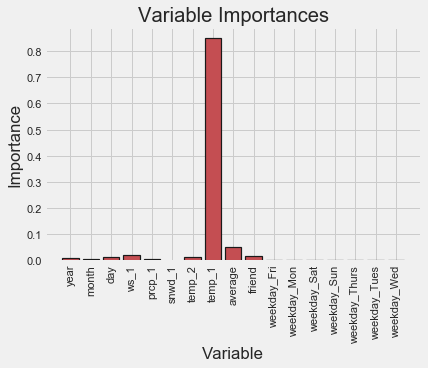

In [29]:
##可视化
plt.style.use('fivethirtyeight')
##位置
x_values=list(range(len(importances)))
##
plt.bar(x_values,importances,orientation='vertical',color='r',edgecolor='k',linewidth=1.2)
##X轴名字竖着写
plt.xticks(x_values,feature_list,rotation='vertical')

##图题
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

Text(0.5, 1.0, 'Cumulative Importances')

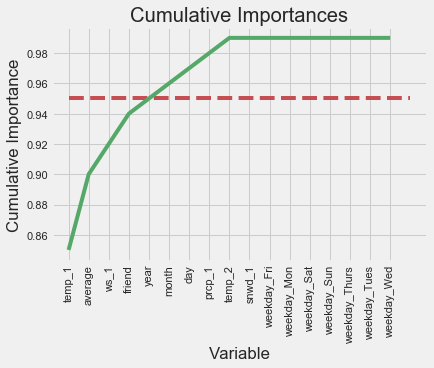

In [33]:
###累计重要性
sorted_importances=[importance[1] for importance in feature_importances]
sorted_features=[importance[0] for importance in feature_importances]
##
cumulative_importances=np.cumsum(sorted_importances)

plt.plot(x_values,cumulative_importances,'g-')

plt.hlines(y=0.95,xmin=0,xmax=len(sorted_importances),colors='r',linestyles='dashed')
plt.xticks(x_values,sorted_features,rotation='vertical')
##
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

**只用上述选取的五个特征进行建模**

In [34]:
important_feature_names=[feature[0] for feature in feature_importances[:5]]
important_indices=[feature_list.index(feature) for feature in important_feature_names]

##重新建立训练集
important_train_features=train_features[:,important_indices]
important_test_features=test_features[:,important_indices]
##数据维度
print('Important train features shape:',important_train_features.shape)
print('Important test features shape:',important_test_features.shape)

##训练模型
rf_exp.fit(important_train_features,train_labels)
##测试
predictions=rf_exp.predict(important_test_features)
errors=abs(predictions-test_labels)
print('平均温度误差：',round(np.mean(errors),2),'degrees.')
##mape
mape=np.mean(100*(errors/test_labels))
accuracy=100-mape
print('Accuracy:',round(accuracy,2),'%.')


Important train features shape: (1643, 5)
Important test features shape: (548, 5)
平均温度误差： 4.11 degrees.
Accuracy: 93.28 %.


**考虑时间效率**

In [37]:
import time
##所有特征
all_features_time=[]
for i in range(10):
    start_time=time.time()
    rf_exp.fit(train_features,train_labels)
    all_feature_predictions=rf_exp.predict(test_features)
    end_time=time.time()
    all_features_time.append(end_time-start_time)
all_features_time=np.mean(all_features_time)
print('使用所有特征时建模与测试的平均时间消耗：',round(all_features_time,2),'秒')

使用所有特征时建模与测试的平均时间消耗： 0.95 秒


In [52]:
##部分特征
reduced_features_time=[]
for i in range(10):
    start_time=time.time()
    rf_exp.fit(important_train_features,train_labels)
    reduced_features_predictions=rf_exp.predict(important_test_features)
    end_time=time.time()
    reduced_features_time.append(end_time-start_time)
reduced_features_time=np.mean(reduced_features_time)
print('使用部分特征时建模与测试的平均时间消耗：',round(reduced_features_time,2),'秒')

使用部分特征时建模与测试的平均时间消耗： 0.61 秒


**分别用预测值来计算评估结果**

In [51]:
all_mape=np.mean(abs(all_feature_predictions-test_labels)/test_labels)
all_accuracy=100*(1 - all_mape)
reduced_mape=np.mean(abs(reduced_features_predictions-test_labels)/test_labels)
reduced_accuracy=100*(1-reduced_mape)


##保存结果
comparison=pd.DataFrame({'feature':['all(17)','reduced(5)'],
                        'accuracy':[round(all_accuracy,2),round(reduced_accuracy,2)],
                        'run_time':[round(all_features_time,2),round(reduced_features_time,2)]})
comparison                           

,feature,accuracy,run_time
0,all(17),93.35,0.95
1,reduced(5),93.28,0.55


**相对效果提升**

In [55]:
relative_accuracy_decrease=100*(all_accuracy-reduced_accuracy)/all_accuracy
print('相对accuracy下降：',round(relative_accuracy_decrease,3),'%.')
relative_runtme_decrease=100*(all_features_time-reduced_features_time)/all_features_time
print('相对时间效率提升：',round(relative_runtme_decrease,3),'%.')

相对accuracy下降： 0.071 %.
相对时间效率提升： 35.694 %.


**所有实验结果对比**

In [58]:
model_comparison=pd.DataFrame({'model':['original','exp_all','exp_reduced'],
                              'error (degrees)':[4.67,4.05,4.11],
                              'accuracy':[92.2,93.35,93.28],
                              'run_time(s)':[0.2,0.95,0.55]})
model_comparison

,model,error (degrees),accuracy,run_time(s)
0,original,4.67,92.20,0.20
1,exp_all,4.05,93.35,0.95
2,exp_reduced,4.11,93.28,0.55


Text(0.5, 1.0, 'Model Run-Time Comparison')

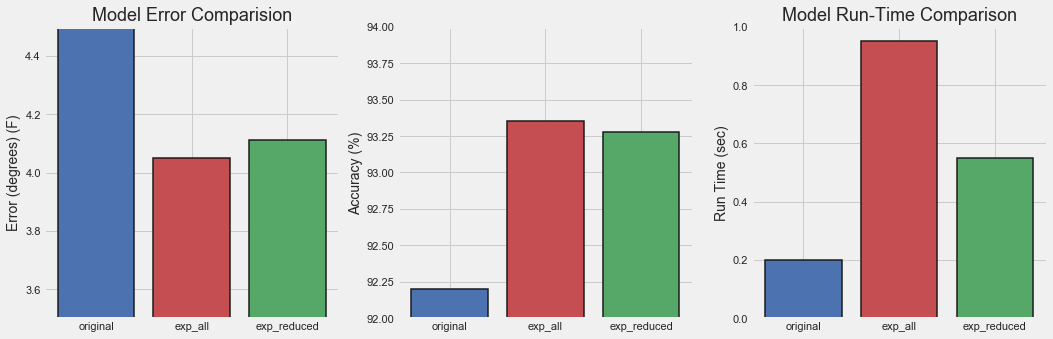

In [61]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,5),sharex=True)
x_values=[0,1,2]
labels=list(model_comparison['model'])
plt.xticks(x_values,labels)

##字体
fontdict={'fontsize':18}
fontdict_yaxis={'fontsize':14}

#预测温度和真实温度差异对比
ax1.bar(x_values,model_comparison['error (degrees)'],color=['b','r','g'],edgecolor='k',linewidth=1.5)
ax1.set_ylim(bottom=3.5,top=4.5)
ax1.set_ylabel('Error (degrees) (F)',fontdict=fontdict_yaxis)
ax1.set_title('Model Error Comparision',fontdict=fontdict)

##精度对比
ax2.bar(x_values,model_comparison['accuracy'],color=['b','r','g'],edgecolor='k',linewidth=1.5)
ax2.set_ylim(bottom=92,top=94)
ax2.set_ylabel('Accuracy (%)',fontdict=fontdict_yaxis)
##时间效率
ax3.bar(x_values,model_comparison['run_time(s)'],color=['b','r','g'],edgecolor='k',linewidth=1.5)
ax3.set_ylim(bottom=0,top=1)
ax3.set_ylabel('Run Time (sec)',fontdict=fontdict_yaxis)
ax3.set_title('Model Run-Time Comparison',fontdict=fontdict)

**最终模型的决策需要通过实际业务应用来判断，分析工作一定要做到位**

## 模型调参

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
from pprint import pprint
##打印参数
pprint(rf.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


**随机参数的选择**

**RandomizedSearchCV.不断随机选择一组合适的参数来建模，并且求其较差验证后的评估结果**

In [71]:
from sklearn.model_selection import RandomizedSearchCV
##建立树的个数
n_estimators=[int(x) for x in np.linspace(200,2000,10)]

#最大特征的选择方式
max_features=['auto','sqrt']
##树的最大深度
max_depth=[int(x) for x in np.linspace(10,20,2)]
max_depth.append(None)

##节点最小分裂所需的样本个数
min_samples_split=[2,5,10]
##叶子节点最小样本数，任何分裂不能让其子节点样本数少于此值
min_samples_leaf=[1,2,4]



##样本采样方法
bootstrap=[True,False]
##随机参数空间
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}

**调参是一个反复的过程，并不是说建模任务就是从前往后，实验结果确定之后，需要回头反复对比不同的参数，不同的处理方案**

In [72]:
##随机选择最合适的参数
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                            n_iter=100,scoring='neg_mean_absolute_error',
                            cv=3,verbose=2,random_state=42,n_jobs=-1)
##训练
rf_random.fit(train_features,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=2)

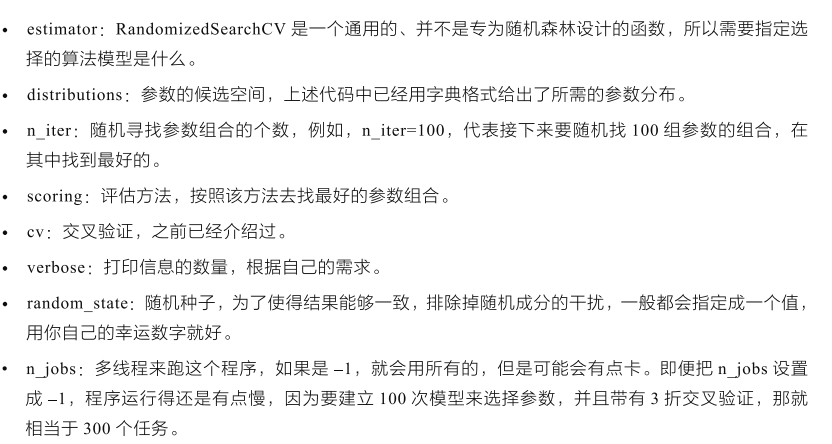

In [74]:
##所选择的最好参数
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

**对比分析**

In [80]:
def evaluate(model,test_features,test_labels):
    predictions=model.predict(test_features)
    errors=abs(predictions-test_labels)
    mape=100 * np.mean(errors/test_labels)
    accuracy=100 - mape
    print('平均气温误差：',np.mean(errors))
    print('Accuracy={:0.2f}%'.format(accuracy))
##默认参数结果
base_model=RandomForestRegressor(random_state=42)
base_model.fit(train_features,train_labels)
evaluate(base_model,test_features,test_labels)

平均气温误差： 4.207299270072992
Accuracy=93.09%


D:\cainiao\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
##经过调参的新配方结果
best_random = rf_random.best_estimator_
evaluate(best_random,test_features,test_labels)

平均气温误差： 4.007550174477602
Accuracy=93.43%


**类似的参数空间设置：网络参数搜索（GridSearch）：（一个一个的遍历）方法同上**

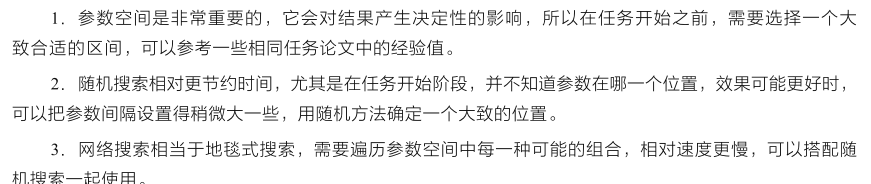

**贝叶斯贝叶斯优化调参**